In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
np.random.seed(23) 
from scipy import stats
from pathlib import Path
import json
from sympy.geometry import Point, Circle 
import math


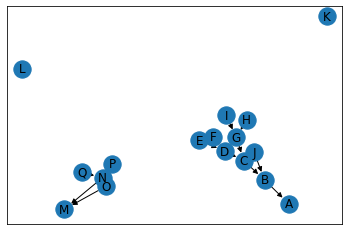

In [2]:
label_graph = nx.DiGraph()
label_graph.add_edge('B','A')
label_graph.add_edge('J','B')
label_graph.add_edge('C','B')
label_graph.add_edge('D','C')
label_graph.add_edge('E','D')
label_graph.add_edge('F','D')
label_graph.add_edge('G','C')
label_graph.add_edge('H','G')
label_graph.add_edge('I','G')
label_graph.add_edge('N','M')
label_graph.add_edge('P','N')
label_graph.add_edge('Q','N')
label_graph.add_edge('O','M')
label_graph.add_nodes_from(['K', 'L'])
nx.draw_networkx(label_graph, arrows=True)

In [3]:
roots = []
for n in label_graph.nodes():
    if label_graph.out_degree(n) == 0:
        roots.append(n)
roots

['A', 'M', 'K', 'L']

In [4]:
list(label_graph.predecessors('P'))

[]

In [5]:
def plot_circles_matplotlib(labels, centres, radii):
    print('Plot Circles Matplotlib...')
    plt.figure(figsize=(20,20))
    for i in range(len(labels)):
        circle=plt.Circle(centres[i],radii[i], fill=False)
        plt.gcf().gca().add_artist(circle)
        plt.gca().annotate(labels[i], xy=(centres[i][0], centres[i][1]+radii[i]), fontsize=20)
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    plt.show()


In [6]:
def plot_circles(labels, circles):
    print('Plot circles...')
    centres = []
    radii = []
    for i, circ in enumerate(circles):
        centres.append(circ.center.coordinates)
        radii.append(circ.radius)
    plot_circles_matplotlib(labels, centres, radii)

Plot circles...
Plot Circles Matplotlib...


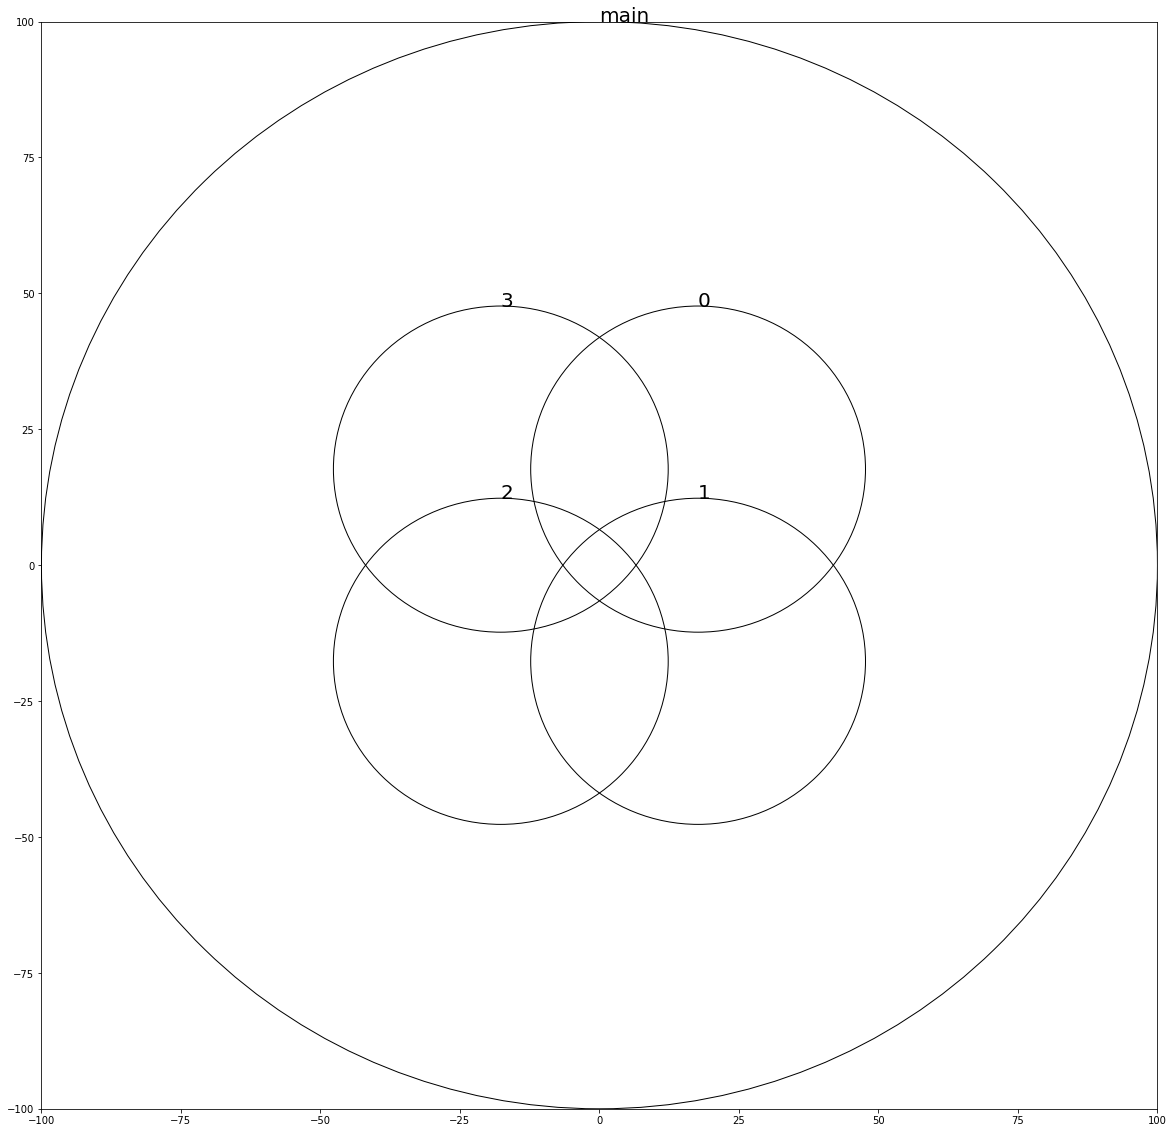

In [331]:
def divide_circle_into_x_circles(c: Circle, n: int, overlap=False):
    if n==1:
        return [Circle(c.center, 0.75*c.radius)]
    if not overlap:
        r = float((1+((n-2)/10 if n<=10 else 0))*c.radius/n)
        rprime = float(c.radius/n)*(n-2) if n>3 else float(c.radius/n)*(n-1)
    else:
        r = float((1+((n-2)/10 if n<=10 else 0))*c.radius/n)
        p = n-2.5 if n<=4 else ((2+(n-4)/n) if n<20  else 5)
        if n==4:
            p = 1
        rprime = float(c.radius/n)*p 
    theta = 360/n
    centres = []
    for i in range(n):
        angle = math.radians((2*i+1)*theta/2)
        y = c.center.coordinates[1]+ (rprime* math.cos(angle))
        x = c.center.coordinates[0]+ (rprime* math.sin(angle))
        centres.append((x,y))
    circles = []
    for i in range(n):
        circles.append(Circle(Point(centres[i]), r))
    return circles

main_c = Circle(Point(0,0), 100)
n=4
circles = divide_circle_into_x_circles(main_c, n, overlap=True) 
plot_circles(['main']+[i for i in range(n)], [main_c]+circles)

Plot circles...
Plot Circles Matplotlib...


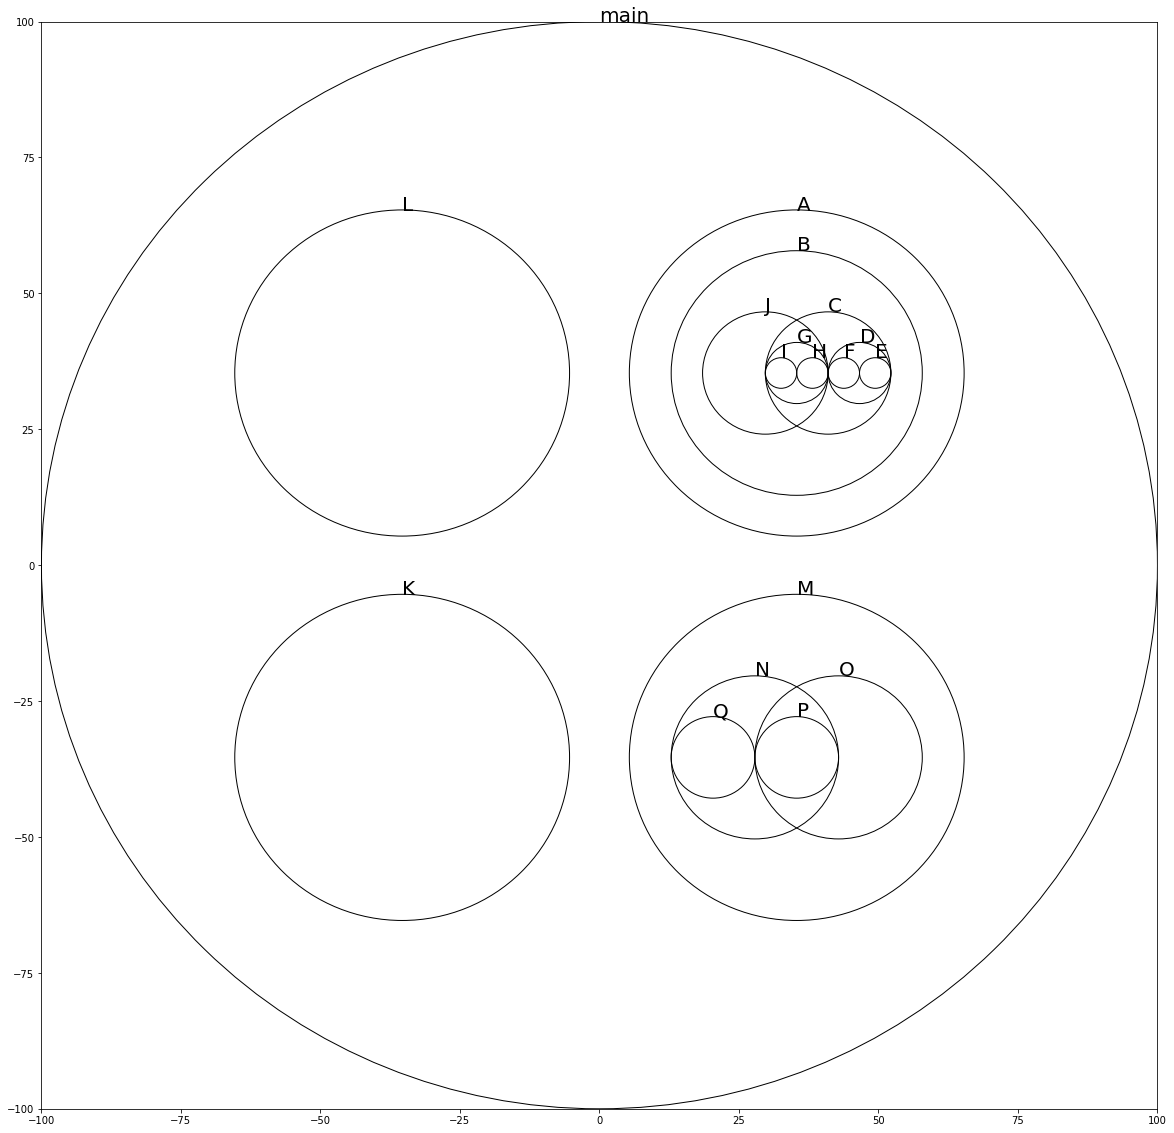

In [355]:
overlap_count=3 #3 for disjoint root and 2 for joint root
count=0
space_dict = {'main': Circle(Point(0,0), 100)}
q = roots.copy()
overlap_flag = False
while len(q)>0:
    if len(space_dict.keys()) == 1:
        circles = divide_circle_into_x_circles(space_dict['main'], len(q), overlap=False)
        for i, label in enumerate(q):
            space_dict[label] = circles[i]
    else:
        n = q.pop(0)
        n_circle = space_dict[n]
        pred = list(label_graph.predecessors(n))
        if len(pred)>0:
            overlap_flag=True if count<overlap_count else False
            circles = divide_circle_into_x_circles(n_circle, len(pred), overlap=overlap_flag)
            count+=1
            for i,p in enumerate(pred):
                q.append(p)
                space_dict[p]=circles[i]
        
            
plot_circles(list(space_dict.keys()), list(space_dict.values()))

In [335]:
data_samples = np.random.uniform(-75, 75, size=(20000, 2))

In [336]:
labels = [i for i in space_dict.keys() if i!='main' ]
print(len(labels), labels)

17 ['A', 'M', 'K', 'L', 'B', 'N', 'O', 'J', 'C', 'P', 'Q', 'D', 'G', 'E', 'F', 'H', 'I']


In [337]:
data = []
for x,y in tqdm(data_samples):
    d = {'x': [x,y], 'labels': []}
    for l in labels:
        x_c, y_c = space_dict[l].center.coordinates
        if (x-x_c)**2+(y-y_c)**2<=space_dict[l].radius**2:
            d['labels'].append(l)
    if len(d['labels']) == 0:
        d['labels'] = ['S']
    data.append(d)


100%|██████████| 20000/20000 [01:12<00:00, 276.70it/s]


In [338]:
data

[{'x': [-16.875160777331622, 35.26476957529525], 'labels': ['L']},
 {'x': [-50.26260312367401, -34.36355938096586], 'labels': ['S']},
 {'x': [64.91165826108485, -32.239189270579764], 'labels': ['S']},
 {'x': [42.743714682793325, 60.438952522609725], 'labels': ['S']},
 {'x': [7.007010734369956, 61.64952234170087], 'labels': ['S']},
 {'x': [62.78232327119713, -27.363965053872505], 'labels': ['S']},
 {'x': [-2.718176697702688, -0.5535643485363977],
  'labels': ['A', 'M', 'K', 'L']},
 {'x': [-34.51886242234888, 57.78076593014103], 'labels': ['S']},
 {'x': [-38.05139903460004, -27.795302783953666], 'labels': ['K']},
 {'x': [-20.065640224949874, 1.2193884771850492], 'labels': ['K', 'L']},
 {'x': [-56.2271226238175, 42.783406587738426], 'labels': ['S']},
 {'x': [41.482976874909184, -49.50895350818983], 'labels': ['S']},
 {'x': [18.805465154526985, -69.16820293151062], 'labels': ['S']},
 {'x': [-26.905632784319828, 15.646132057534558], 'labels': ['L']},
 {'x': [74.83965194855594, -69.201445098

In [339]:
np.random.shuffle(data)

In [340]:
data_new = []
for d in data:
    d['x'] = list(np.array(d['x'])/75)
    data_new.append(d)

In [341]:
train_len = int(0.5*len(data_new))
dev_len = int(0.5*(len(data_new)-train_len))
train = data_new[:train_len]
dev = data_new[train_len:train_len+dev_len]
test = data_new[train_len+dev_len:]
print(len(train), len(dev), len(test))

10000 5000 5000


In [342]:
data_dir = Path('../.data/toy_data_multiple_paths')
with open(data_dir/'train.json', 'w') as outfile:
    json.dump(train, outfile)
with open(data_dir/'dev.json', 'w') as outfile:
    json.dump(dev, outfile)
with open(data_dir/'test.json', 'w') as outfile:
    json.dump(test, outfile)

In [343]:
with open(data_dir/'hierarchy.edgelist', 'wb') as f:
    nx.write_edgelist(label_graph, f)

In [344]:
# modifying training data to have noise: drop random samples
example_count_with_more_labels = 0
for d in train:
    if len(d['labels'])>1:
        example_count_with_more_labels+=1
example_count_with_more_labels

1735

In [345]:
train_cop = train.copy()
drop_count = 0.3*example_count_with_more_labels
c = 0
train_drop_random_labels = []
for i in range(len(train)):
    d = train[i]
    if c<drop_count and len(d['labels'])>1:
        d['labels'] = list(np.random.choice(d['labels'], size=len(d['labels'])-1, replace=False))
        c+=1
    train_drop_random_labels.append(d)

In [346]:
train_drop_random_labels
# modifying training data to have noise: drop random samples
example_count_with_more_labels = 0
for d in train_drop_random_labels:
    if len(d['labels'])>1:
        example_count_with_more_labels+=1
example_count_with_more_labels

1489

In [347]:
# with open(data_dir/'train_noise_drop_labels.json', 'w') as outfile:
#     json.dump(train_drop_random_labels, outfile)

In [348]:
with open(data_dir/'train.json', 'r') as outfile:
    train = json.load(outfile)
train_cop = train.copy()
add_count = 0.3*len(train)


In [349]:
train_add_random_labels = []
c=0
for i in range(len(train)):
    d = train[i]
    if c<add_count and len(d['labels'])==1:
        label_choices = labels.copy()
        try: 
            label_choices.remove(d['labels'][0])
        except:
            print('.')
        print(d['labels'])
        d['labels'] = d['labels']+ list(np.random.choice(label_choices, size=1, replace=False))
        print('After', d['labels'])
        c+=1
    train_add_random_labels.append(d)
print(c)

.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'M']
['L']
After ['L', 'F']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'F']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'J']
['K']
After ['K', 'J']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'H']
['A']
After ['A', 'M']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'G']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'N']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'C']
['M']
After ['M', 'A']
['K']
After ['K', 'I']
['L']
After ['L', 'G']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'K']
['L']
After ['L', 'Q']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'N']
['K']
After ['K', 'E']
.
['S']
After ['S', 'F']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'G']
['L']
After ['L', 'D']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'L']
.
['S']
After ['S'

After ['S', 'H']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'I']
['K']
After ['K', 'F']
.
['S']
After ['S', 'O']
['L']
After ['L', 'P']
.
['S']
After ['S', 'J']
['L']
After ['L', 'K']
.
['S']
After ['S', 'A']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'I']
['L']
After ['L', 'A']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'G']
.
['S']
After ['S', 'N']
['K']
After ['K', 'Q']
.
['S']
After ['S', 'G']
['M']
After ['M', 'P']
.
['S']
After ['S', 'A']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'F']
.
['S']
After ['S', 'N']
['M']
After ['M', 'I']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'N']
['A']
After ['A', 'K']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'N']
['M']
After ['M', 'O']
.
['S']
After ['S', 'K']
.

.
['S']
After ['S', 'J']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'O']
['K']
After ['K', 'P']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'M']
['M']
After ['M', 'C']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'N']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'H']
['L']
After ['L', 'A']
['M']
After ['M', 'A']
.
['S']
After ['S', 'O']
['M']
After ['M', 'H']
['L']
After ['L', 'N']
.
['S']
After ['S', 'P']
['K']
After ['K', 'Q']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'N']
['K']
After ['K', 'F']
.
['S']
After ['S', 'D']
['K']
After ['K', 'B']
['A']
After ['A', 'P']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'F']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'N']
['M']
After ['M', 'E']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'I

After ['S', 'E']
.
['S']
After ['S', 'G']
['L']
After ['L', 'I']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'G']
['L']
After ['L', 'E']
['A']
After ['A', 'Q']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'D']
['K']
After ['K', 'Q']
['L']
After ['L', 'O']
.
['S']
After ['S', 'P']
['K']
After ['K', 'P']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'B']
['A']
After ['A', 'K']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'C']
['L']
After ['L', 'N']
['L']
After ['L', 'Q']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'P']
['M']
After ['M', 'D']
.
['S']
After ['S', 'B']
['K']
After ['K', 'O']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'A']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'M']
['K']
After ['K', 'B']
.
['S']
After ['S', 'F']
.
['S']
After ['S', 'G']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'M']
['L']
After ['L', 'Q']
.
['S']
After ['S', 'K']
['M']
After ['M', 'I']
.
['S']
After ['S', 'Q']
.
['S']
Aft

.
['S']
After ['S', 'L']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'N']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'O']
['K']
After ['K', 'I']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'A']
['M']
After ['M', 'K']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'J']
['L']
After ['L', 'A']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'M']
['M']
After ['M', 'B']
.
['S']
After ['S', 'N']
.
['S']
After ['S', 'M']
['K']
After ['K', 'D']
.
['S']
After ['S', 'H']
['L']
After ['L', 'P']
.
['S']
After ['S', 'A']
.
['S']
After ['S', 'K']
['L']
After 

['S']
After ['S', 'J']
.
['S']
After ['S', 'B']
['K']
After ['K', 'D']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'J']
['K']
After ['K', 'I']
.
['S']
After ['S', 'F']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'L']
['A']
After ['A', 'F']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'J']
['M']
After ['M', 'J']
['L']
After ['L', 'M']
['K']
After ['K', 'J']
['L']
After ['L', 'F']
.
['S']
After ['S', 'L']
['M']
After ['M', 'D']
.
['S']
After ['S', 'F']
.
['S']
After ['S'

.
['S']
After ['S', 'G']
.
['S']
After ['S', 'D']
['L']
After ['L', 'Q']
.
['S']
After ['S', 'K']
['L']
After ['L', 'N']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'P']
['K']
After ['K', 'I']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'B']
['K']
After ['K', 'J']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'G']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'N']
['M']
After ['M', 'H']
['A']
After ['A', 'B']
.
['S']
After ['S', 'G']
['L']
After ['L', 'C']
['M']
After ['M', 'J']
['L']
After ['L', 'B']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'Q']
.
['S']
After ['S'

After ['S', 'A']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'K']
['M']
After ['M', 'H']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'I']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'N']
.
['S']
After ['S', 'G']
.
['S']
After ['S', 'K']
.
['S']
After ['S', 'C']
.
['S']
After ['S', 'I']
['L']
After ['L', 'D']
.
['S']
After ['S', 'I']
['L']
After ['L', 'M']
.
['S']
After ['S', 'B']
.
['S']
After ['S', 'H']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'A']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'D']
.
['S']
After ['S', 'L']
.
['S']
After ['S', 'E']
.
['S']
After ['S', 'P']
.
['S']
After ['S', 'P']
['L']
After ['L', 'K']
['K']
After ['K', 'M']
.
['S']
After ['S', 'O']
['K']
After ['K', 'N']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'Q']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'J']
.
['S']
After ['S', 'O']
.
['S']
After ['S', 'E']
['L']
After ['L', 'M']
.
['S']
After ['S', 'M']
.
['S']
After ['S', 'J']
['K']
After ['K', 'A']
.
['S']
After ['S', 'C']

In [351]:
# with open(data_dir/'train_noise_add_labels.json', 'w') as outfile:
#     json.dump(train_add_random_labels, outfile)

In [352]:
#Comparing noise percentages
with open(data_dir/'train.json', 'r') as outfile:
    train = json.load(outfile)
with open(data_dir/'train_noise_add_labels.json', 'r') as outfile:
    train_add_random_labels=json.load(outfile)
with open(data_dir/'train_noise_drop_labels.json', 'r') as outfile:
    train_drop_random_labels=json.load(outfile)

In [353]:
drop_count = 0
add_count = 0
for i in range(len(train)):
    if set(train[i]['labels'])!=set(train_drop_random_labels[i]['labels']):
        drop_count+=1
    if set(train[i]['labels'])!=set(train_add_random_labels[i]['labels']):
        add_count+=1
print(drop_count/len(train), add_count/len(train))

0.0521 0.3
